# Sales Project

Data Set from: https://www.kaggle.com/jr2ngb/superstore-data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math 
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.api import OLS
from scipy.stats import ttest_1samp

#### Get rid of the spaces in the column names ####

In [2]:
import csv, re
path = ('C:\ProjectFiles\superstore_dataset2011-2015.csv')
file = open(path,newline='')
d_reader = csv.DictReader(file)
reader = csv.reader(file)

header = d_reader.fieldnames
h = header

def snake_case(h):
    return re.sub(r'\s','_',h).strip('_').lower()
               
new_header = [snake_case(item) for item in h]


new_path = ('C:\ProjectFiles\sales.csv')
with open(new_path,'w',newline='') as new_file:
    output_writer = csv.writer(new_file,delimiter=',')
    output_writer.writerow(new_header)
    for line in reader:
        output_writer.writerow(line)
new_file.close()
file.close()

In [3]:
new_header

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'postal_code',
 'market',
 'region',
 'product_id',
 'category',
 'sub-category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority']

In [4]:
us_data = pd.read_csv(r'C:\ProjectFiles\sales_us.csv')    # can't create dataframe for file & new_file bc contains foreign letters
print(us_data.shape)   # produced in sql 

(6026, 24)


### Create dataframe for specific year to analyze ###

In [5]:
data = pd.read_csv(r'C:\ProjectFiles\sales\sales_2019.csv')    # produced in sql, 2019

In [6]:
print(data.shape)
print('COGS column was built in sql using algebra since it was not in the original data set.')
data.tail()

(2001, 16)
COGS column was built in sql using algebra since it was not in the original data set.


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,city,state,category_id,sub_category,item_price,quantity,discount,sales,cogs,profit
1996,CA-2014-117933,2019-12-30,2019-12-30,Standard Class,RF-19840,Roy Franzцsisch,New York City,New York,OFF-AP-100,Appliances,11.97,3,0.0,35.910,26.21,9.6957
1997,US-2014-147669,2019-12-31,2019-12-31,Standard Class,SV-20935,Susan Vittorini,Fairfield,Ohio,OFF-FA-100,Fasteners,3.78,13,0.2,39.312,26.54,12.7764
1998,CA-2014-163671,2019-12-31,2019-12-31,Standard Class,DP-13105,Dave Poirier,Meridian,Idaho,OFF-BI-100,Binders,8.88,3,0.2,21.312,13.32,7.9920
1999,US-2014-147669,2019-12-31,2019-12-31,Standard Class,SV-20935,Susan Vittorini,Fairfield,Ohio,OFF-BI-100,Binders,43.41,1,0.7,13.023,23.44,-10.4184
2000,CA-2014-112487,2019-12-31,2019-12-31,Standard Class,TC-21535,Tracy Collins,Columbus,Ohio,OFF-BI-100,Binders,5.22,2,0.7,3.132,5.74,-2.6100


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       2001 non-null   object 
 1   order_date     2001 non-null   object 
 2   ship_date      2001 non-null   object 
 3   ship_mode      2001 non-null   object 
 4   customer_id    2001 non-null   object 
 5   customer_name  2001 non-null   object 
 6   city           2001 non-null   object 
 7   state          2001 non-null   object 
 8   category_id    2001 non-null   object 
 9   sub_category   2001 non-null   object 
 10  item_price     2001 non-null   float64
 11  quantity       2001 non-null   int64  
 12  discount       2001 non-null   float64
 13  sales          2001 non-null   float64
 14  cogs           2001 non-null   float64
 15  profit         2001 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 250.2+ KB


In [8]:
data.sub_category.value_counts()

Binders       495
Paper         461
Storage       286
Art           282
Appliances    168
Labels        116
Envelopes      72
Supplies       61
Fasteners      60
Name: sub_category, dtype: int64

In [9]:
grp = data.groupby('sub_category')
x = grp['quantity'].agg(np.sum)    # sum of the units by category
y = grp['sales'].agg(np.sum)    # sum of category revenue 
z = grp['profit'].agg(np.mean)    # average profit by category
print(x)
print(y)
print(z)

sub_category
Appliances     659
Art           1108
Binders       2049
Envelopes      244
Fasteners      234
Labels         451
Paper         1719
Storage       1011
Supplies       191
Name: quantity, dtype: int64
sub_category
Appliances    42852.702
Art            8888.842
Binders       72799.549
Envelopes      3406.366
Fasteners       814.980
Labels         3817.440
Paper         27612.460
Storage       67935.666
Supplies      16064.154
Name: sales, dtype: float64
sub_category
Appliances    46.694567
Art            7.900504
Binders       15.704727
Envelopes     20.169181
Fasteners      4.776223
Labels        14.852628
Paper         25.983847
Storage       24.964423
Supplies     -15.525728
Name: profit, dtype: float64


## Exploratory Analysis ##

Text(0, 0.5, 'Frequency')

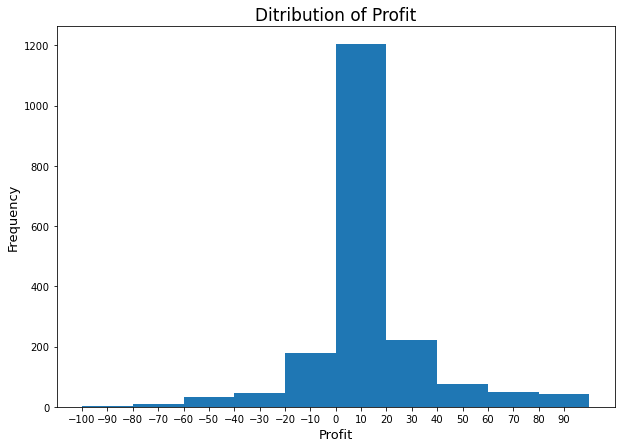

In [10]:
data.profit.plot(kind='hist',figsize=(10,7),range=[-100,100])
plt.xticks(np.arange(-100,100,10))
plt.title('Ditribution of Profit',size=17)
plt.xlabel('Profit',size=13)
plt.ylabel('Frequency',size=13)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Paper'),
  Text(1, 0, 'Art'),
  Text(2, 0, 'Appliances'),
  Text(3, 0, 'Labels'),
  Text(4, 0, 'Envelopes'),
  Text(5, 0, 'Supplies'),
  Text(6, 0, 'Binders'),
  Text(7, 0, 'Storage'),
  Text(8, 0, 'Fasteners')])

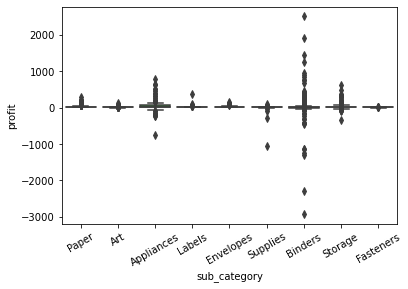

In [11]:
sns.boxplot(x= 'sub_category',y='profit',data=data)
plt.xticks(rotation=30)

*When was profit over $2000?*

In [12]:
data[data.profit >2000]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,city,state,category_id,sub_category,item_price,quantity,discount,sales,cogs,profit
60,CA-2014-138289,2019-01-19,2019-01-19,Second Class,AR-10540,Andy Reiter,Jackson,Michigan,OFF-BI-100,Binders,1360.99,4,0.0,5443.96,2939.74,2504.2216


**Interesting. I Will conduct further analysis later on to see when sales were plummeting/rising for each different sub-category.**

In [13]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'city', 'state', 'category_id', 'sub_category',
       'item_price', 'quantity', 'discount', 'sales', 'cogs', 'profit'],
      dtype='object')

In [14]:
num = data[['item_price', 'quantity', 'discount','cogs','sales', 'profit']]
df = pd.DataFrame(num)

In [15]:
num.describe()

,item_price,quantity,discount,cogs,sales,profit
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,40.181374,3.831084,0.159870,102.305522,122.035062,19.729854
std,114.864547,2.192819,0.231136,324.831029,353.582923,155.457274
min,1.140000,1.000000,0.000000,0.900000,0.444000,-2929.484500
25%,5.280000,2.000000,0.000000,8.660000,11.760000,2.085000
50%,9.310000,3.000000,0.000000,19.730000,26.720000,6.703200
75%,30.980000,5.000000,0.200000,64.280000,82.400000,20.370000
max,1889.990000,14.000000,0.800000,5713.080000,5443.960000,2504.221600


<AxesSubplot:>

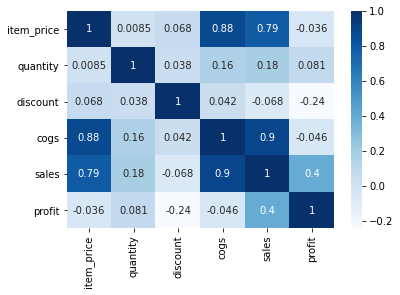

In [16]:
# ecploratory analysis
sns.heatmap(df.corr(),annot=True,cmap='Blues')

*Will need to remove highly correlated ind variables if building a regression model*

**Sales and Profit seem to be fairly correlated. I'll demonstrate if any causal relationship between those variables exist by creating a linear regression model. I will be holdong the variables quantity and discount constant.**

## Linear Regression Model Using OLS Method ##

In [17]:
exp = data[['quantity', 'discount','sales']]    # data.loc[:['quantity', 'discount','sales']]
outcome =  data['profit']
a = list(enumerate(exp))
a

[(0, 'quantity'), (1, 'discount'), (2, 'sales')]

In [18]:
for i in enumerate(exp):
    print(data[[i[1]]])

      quantity
0            6
1            3
2            2
3            7
4            3
...        ...
1996         3
1997        13
1998         3
1999         1
2000         2

[2001 rows x 1 columns]
      discount
0          0.2
1          0.0
2          0.0
3          0.0
4          0.2
...        ...
1996       0.0
1997       0.2
1998       0.2
1999       0.7
2000       0.7

[2001 rows x 1 columns]
       sales
0     25.344
1     53.970
2      7.900
3     20.160
4     27.792
...      ...
1996  35.910
1997  39.312
1998  21.312
1999  13.023
2000   3.132

[2001 rows x 1 columns]


In [19]:
model = LinearRegression()

May want to remove extreme outliers if not performing multivariate regression


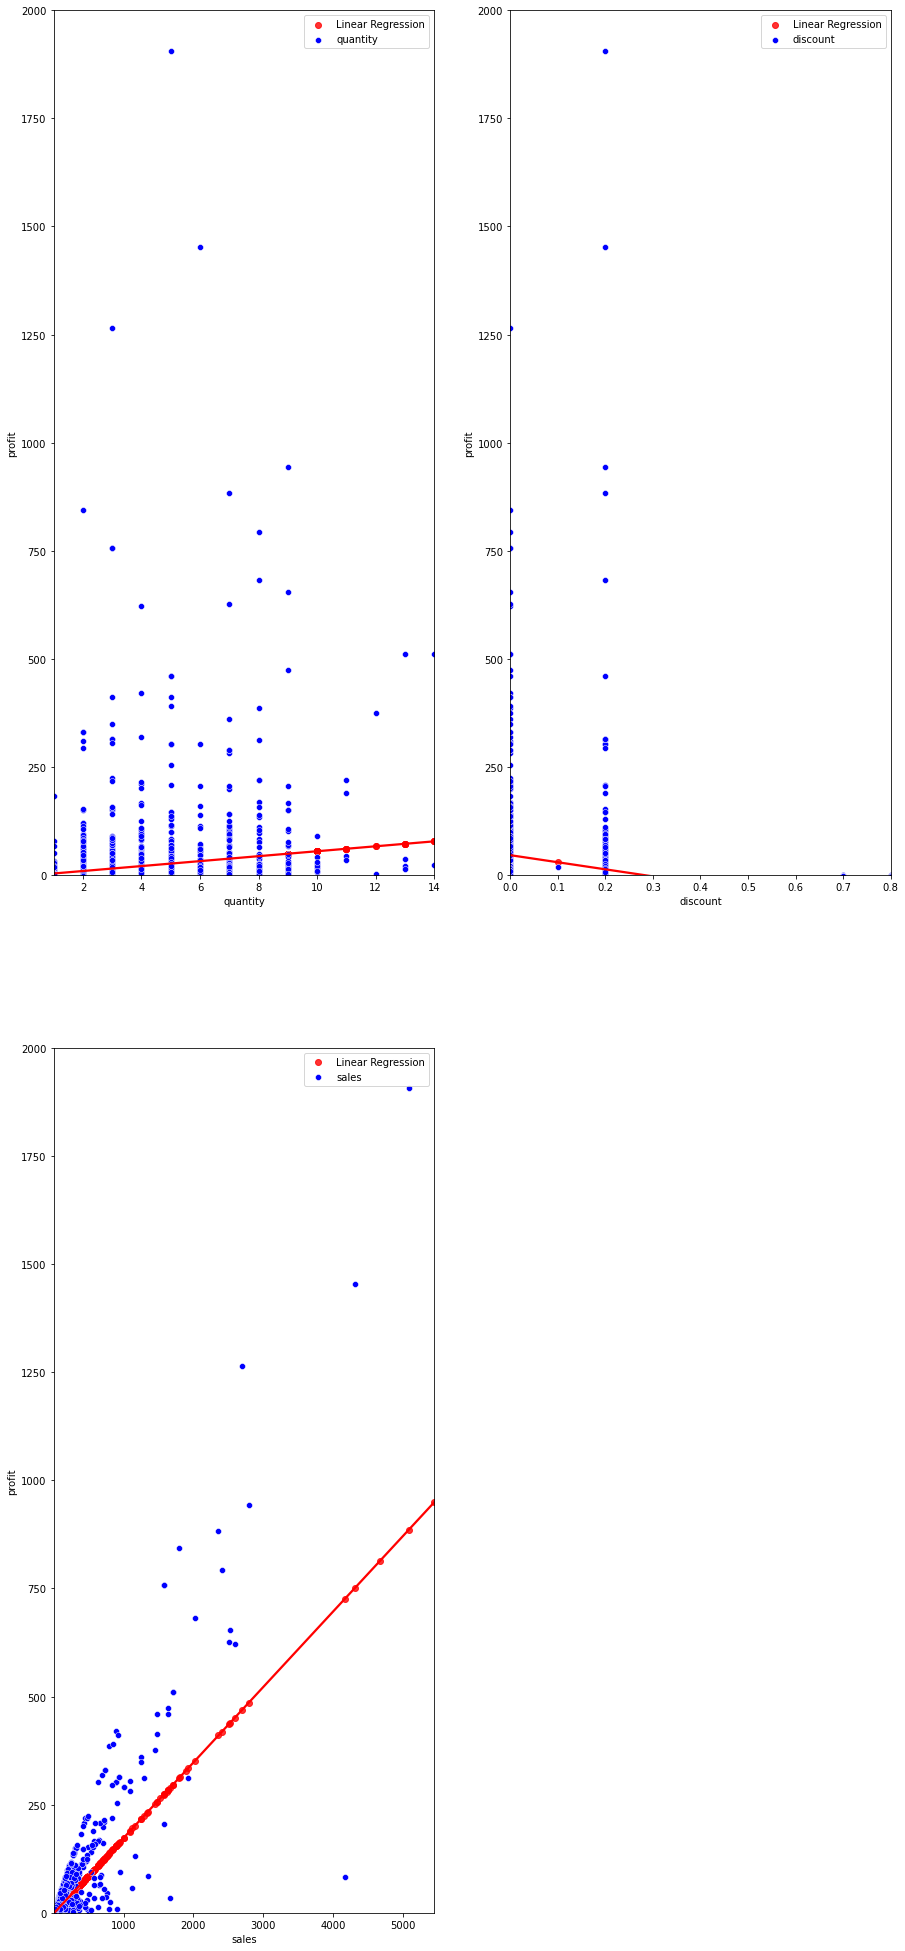

In [40]:
plt.figure(figsize=(15,35))

for i in enumerate(exp):
    model.fit(data[[i[1]]],outcome)
    plt.subplot(2,2,i[0]+1)
    plt.ylim(0,2000)
    b_pred = model.predict(data[[i[1]]])
    sns.regplot(x=data[i[1]],y=b_pred,label='Linear Regression',color='red')
    sns.scatterplot(data=data,x=data[i[1]],y=outcome,color='blue',label=i[1])
    plt.legend(bbox_to_anchor=(1,1),loc=1)

print('May want to remove extreme outliers if not performing multivariate linear regression')

In [24]:
type(exp)

pandas.core.frame.DataFrame

In [25]:
df = pd.DataFrame(exp)
target = pd.DataFrame(outcome)
print(type(df))
print(type(target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [36]:
x = exp    # x = df
y = outcome    # y = target
model.fit(x,y)
pred = model.predict(x)
print(pred[:5])

[ 0.62937086 30.75119118 21.73835087 30.46785508 -2.97494466]


In [27]:
print('R^2:',model.score(x,y))    #for R squared
print('intercept:',model.intercept_)  #for y-intercept
print('coefficients:',model.coef_)   #for coefficients

R^2: 0.20518201053672136
intercept: 17.747403172233437
coefficients: [   1.33738749 -146.82386303    0.16660414]


*In practice, you would not use the entire dataset, 
but you would instead split your data into a training set and a test set.*

In [33]:
m = x.shape[0]      # number of rows of data
n = x.shape[1]      # number of explanatory variables
x_with_intercept = np.c_[np.ones(x.shape[0]), x]


sigma_square_hat = np.linalg.norm(y - model.predict(x)) ** 2 / (m-(n+1))
var_pred_coef = sigma_square_hat*np.linalg.pinv(x_with_intercept.T @ x_with_intercept) #returns inv when exists & pseudo-invo when doesn't

for i in range(n+1):
    standard_error = var_pred_coef[i,i] ** 0.5 
    print(f"Standard Error of coef[{i}]: {standard_error}")
    
    t_values = z[i]/standard_error
    print(f"t_value of coef[{i}]: {t_values}")
    
    p_values = 2*(1- stats.t.cdf(abs(t_values), df=x.shape[0]-(x.shape[1] + 1)))   # df = degrees of freedom
    print(f"p_value of coef[{i}]: {p_values}") 
    print('-'*75)

Standard Error of coef[0]: 6.541831578380402
t_value of coef[0]: 2.71291043793996
p_value of coef[0]: 0.006726766230994663
---------------------------------------------------------------------------
Standard Error of coef[1]: 1.4409886852231495
t_value of coef[1]: 0.928104085543126
p_value of coef[1]: 0.35346574000775566
---------------------------------------------------------------------------
Standard Error of coef[2]: 13.466787562031632
t_value of coef[2]: -10.902664228636134
p_value of coef[2]: 0.0
---------------------------------------------------------------------------
Standard Error of coef[3]: 0.00895097695175299
t_value of coef[3]: 18.612956221093288
p_value of coef[3]: 0.0
---------------------------------------------------------------------------


In [35]:
x.columns

Index(['quantity', 'discount', 'sales'], dtype='object')

In [30]:
ols_parameters = [[model.intercept_,model.intercept_]]
for i in model.coef_:
    ad = [model.intercept_,i]
    ols_parameters.append(ad)
print(ols_parameters)

[[17.747403172233437, 17.747403172233437], [17.747403172233437, 1.3373874859770225], [17.747403172233437, -146.82386302720428], [17.747403172233437, 0.16660414213899344]]


In [31]:
z=[model.intercept_]
ab = model.coef_.tolist()
z = z+ab
z

[17.747403172233437,
 1.3373874859770225,
 -146.82386302720428,
 0.16660414213899344]

In [32]:
OLS(y,x_with_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     171.8
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           4.23e-99
Time:                        20:45:29   Log-Likelihood:                -12707.
No. Observations:                2001   AIC:                         2.542e+04
Df Residuals:                    1997   BIC:                         2.544e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7474      6.542      2.713      0.007       4.918      30.577
x1             1.3374      1.441      0.928      0.353      -1.489       4.163
x2          -146.8239     13.467    -10.903      0.000    -173.234    -120.413
x3             0.1666      0.009     18.613      0.000       0.149       0.184
==============================================================================
Omnibus:                     3319.069   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4253608.004
Skew:                         -10.543   Prob(JB):                         0.00
Kurtosis:                     227.885   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**As we can see, only the coefficient estimates for the explanatory variables discount and sales are statistically significant at the 5% level.Thus, we can be coniident of the patterns that, holding the other factors constants, the higher the sales are the higher the gross profit will be, while the higher the discount the lower gross profit there will be, holding these other factors constant**